YOLOv5  2023-5-30 Python-3.7.12 torch-1.13.1+cpu CPU

Fusing layers... 
Model summary: 206 layers, 3089188 parameters, 0 gradients, 4.2 GFLOPs
Adding AutoShape... 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
D:\code\opencvlearn\example_case\idcard\test./val\00002d0fe93d4ae5b11835bacabb7220.jpg
{'姓名': '苑文婷', '性别': '女', '民族': '汉', '住址': '天津市滨海新区生杰城海晨道瑞龙南苑32号楼1门1301号', 'success': True, '出生年': '1989', '身份证号码': '131082198911010762'}


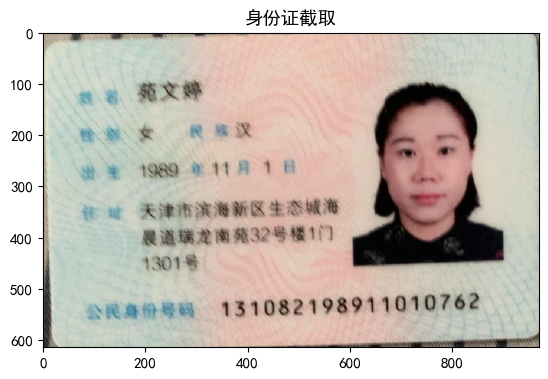

TypeError: cannot unpack non-iterable NoneType object

In [34]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import cv2
from example_case.idcard.card import Card, Yolov5Card
from myutils import common
from myutils.common import get_all_files

#dir_path = os.getcwd() + "/../images"
dir_path = os.getcwd() + "./val"
all_files = get_all_files(dir_path)
Yolov5Card.confYolov5('D:\\code1\\yolov5-master\\yolov5-master','../yolov5/best.pt')
for i in all_files:
    card=Yolov5Card(i,isDebug=False)
    img,label=card.getCardImg()
    print(i)
    if img is not None:
        common.show(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), "身份证截取", cmap=None, debug=False)
        # if img is not None:
        #     common.show(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), "身份证截取", cmap=None, debug=True)
        data_areas=card.get_data_areas(img)
        result=card.ocrArea(data_areas)
        if(result["success"]):
            print(i)
            print(result)
        else:
            print(i,"无法解析")